# *DiD Design-Based Diagnostics*, e o *Difference-in-Differences Event Study Design*

Prof. Daniel de Abreu Pereira Uhr

* Introdução
* *Design-Based Diagnostics*
  * Placebo no Tratamento (fake treated units)
  * Placebo no resultado
  * Placebo no tempo
* Evidências para a Hipótese de Tendências Paralelas
  * Event Study Design



## Referências

* Cunningham, S. W. (2013). Causal inference: The mixtape. https://www.scunning.com/mixtape.html
* Roth, Sant´Anna, Bilinski and Poe (2023), What’s Trending in Difference-in-Differences? A Synthesis of the Recent Econometrics Literature.
* Joshua D. Angrist and Jörn-Steffen Pischke (2009). Mostly Harmless Econometrics: An Empiricist's Companion. Princeton University Press.
* Facure, Matheus. Causal Inference for Brave and True. https://matheusfacure.github.io/python-causality-handbook/landing-page.html 
* [Avaliação Econômica de Projetos Sociais. Itaú Social, 2017](https://www.itausocial.org.br/wp-content/uploads/2018/05/avaliacao-economica-3a-ed_1513188151.pdf). Capítulos 1, 2 e 3. 
* Card and Krueger (1994). Minimum Wages and Employment: A Case Study of the Fast-Food Industry in New Jersey and Pennsylvania. American Economic Review, 84(4):772-793. (https://davidcard.berkeley.edu/papers/njmin-aer.pdf)
* Notas próprias.​



**Observações:** O material apresentado aqui é uma adaptação do material de aula do Prof. Daniel de Abreu Pereira Uhr, e não deve ser utilizado para fins comerciais. O material é disponibilizado para fins educacionais e de pesquisa, e não deve ser reproduzido sem a devida autorização do autor. Este material pode conter erros e imprecisões. O autor não se responsabiliza por quaisquer danos ou prejuízos decorrentes do uso deste material. O uso deste material é de responsabilidade exclusiva do usuário. Caso você encontre erros ou imprecisões neste material, por favor, entre em contato com o autor para que possam ser corrigidos. O autor agradece qualquer *feedback* ou sugestão de melhoria.

---

## Testes Placebo em Diferença em Diferenças

Os **testes placebo** (ou *falsification tests*) são exercícios empíricos cujo objetivo é verificar se o estimador de Diferença em Diferenças (DiD) está capturando de fato um efeito causal do tratamento, ou se responde a **correlações espúrias** ou **padrões não relacionados à intervenção**.

**Lógica:**

- Se o tratamento **não ocorreu** (porque foi atribuído ficticiamente a outro grupo, outro tempo ou outro resultado), o DiD **não deveria estimar um efeito estatisticamente significativo**.  
- Caso se observe um “efeito placebo” consistente, isso sugere que o modelo pode estar captando outros fatores (viés de especificação, choques coincidentes, tendências diferenciadas etc.), e não o impacto causal da intervenção.  

**Os tipos de testes placebo**
* Placebo no Tratamento (fake treated units)
* Placebo no Tempo (fake intervention dates)
* Placebo no Resultado (fake outcomes)


### Placebo no Tratamento (*fake treated units*)

- **Ideia**: aplicar o tratamento a um grupo que de fato nunca foi tratado.  
- **Exemplo**: selecionar aleatoriamente municípios da amostra de controle e rodar a estimação como se tivessem recebido a política pública.  
- **Interpretação**: encontrar efeito nesses grupos sugere que o DiD não está isolando adequadamente a variação causal do tratamento.  

**Formalização:**  
Seja $D_{it}$ a dummy de tratamento real. Defina um tratamento falso $D^{pl}_{it}$ atribuído a unidades-controle.  
O estimador placebo é:

$$
\hat{\delta}^{pl} =
\big( \bar{Y}_{1}^{pl,post} - \bar{Y}_{1}^{pl,pre} \big) -
\big( \bar{Y}_{0}^{post} - \bar{Y}_{0}^{pre} \big)
$$

onde $1^{pl}$ denota o grupo “tratado fictício”.  
Se $\hat{\delta}^{pl} \neq 0$, há indícios de problema no modelo.  


### Placebo no Tempo (*fake intervention dates*)

- **Ideia**: simular que o tratamento ocorreu em um período anterior à intervenção real.  
- **Exemplo**: se a política foi implementada em 2015, estimar os efeitos como se tivesse sido em 2010.  
- **Interpretação**: detectar efeito antes da implementação sugere **violações da hipótese de tendências paralelas** ou **antecipação do tratamento**.  

**Formalização:**  
Defina $T^{pl}$ como um falso período de intervenção anterior a $T^*$.  
A estimação é feita com:

$$
Y_{it} = \alpha + \lambda_t + \gamma_i +
\delta^{pl} \cdot (D_i \cdot 1\{t \geq T^{pl}\}) + \varepsilon_{it}
$$

Se $\hat{\delta}^{pl}$ for significativamente diferente de zero, isso sugere que o grupo tratado já apresentava trajetória diferente antes do tratamento real.  


### Placebo no Resultado (*fake outcomes*)

- **Ideia**: usar uma variável de resultado que, teoricamente, não poderia ser afetada pela intervenção.  
- **Exemplo**: avaliar o impacto de um programa educacional sobre **mortalidade adulta**; ou de uma política ambiental sobre **consumo de refrigerantes**.  
- **Interpretação**: efeitos estatisticamente significativos sobre outcomes irrelevantes levantam dúvidas sobre a validade da estimação.  

**Formalização:**  
Estima-se o modelo usual de DiD, mas substituindo $Y_{it}$ por um outcome placebo $Y^{pl}_{it}$, cuja relação causal com $D_{it}$ é nula.  
Esperamos:  

$$
\mathbb{E}[\hat{\delta}^{pl}] = 0
$$  


### Interpretação Geral

- Os testes placebo **não provam** que o modelo é válido, mas **reforçam a credibilidade** do resultado quando não encontram efeitos espúrios.  
- Se efeitos placebo aparecem, isso sugere problemas como:  
  - heterogeneidade de tendências não controlada,  
  - choques coincidentes com a política,  
  - especificação incorreta do modelo.  


## Aplicação em Python

Para aplicação dos Diagnósticos e dos conceitos em Diferença em Diferenças, vamos utilizar os dados do artigo :

* Stevenson, Betsey & Wolfers, Justin. "Bargaining in the Shadow of the Law: Divorce Laws and Family Distress". The Quarterly Journal of Economics, Volume 121, Issue 1, February 2006, Pages 267–288, https://doi.org/10.1093/qje/121.1.267

<div style="text-align:center;">
    <img src="images\DD_FIG16.png"  alt="Imagem" style="width: 500px;"/>
</div>



A ideia do artigo de Stevenson and Wolfers (2006) é aproveitar que o momento diferente da reforma da lei do divórcio entre os estados americanos fornece um quase-experimento útil para examinar os efeitos dessa mudança. Eles analisam os dados em painel estadual para estimar as mudanças nas taxas de suicídio, violência doméstica e homicídio conjugal decorrentes da mudança na lei do divórcio.

Para fixar os conceitos anteriores vamos trabalhar com uma subamostra, posteriormente utilizaremos a amostra completa.

In [66]:
# Pacotes
import numpy as np
import pandas as pd
import plotnine as p
import statsmodels.api as sm
import linearmodels as lm
import statsmodels.formula.api as smf

In [67]:
data = pd.read_stata("https://github.com/Daniel-Uhr/data/raw/main/bacon_example.dta")

In [68]:
data

,stfips,year,_nfd,post,asmrs,pcinc,asmrh,cases,weight,copop
0,1,1964.0,1971.0,0.0,35.639885,12406.178537,5.007341,0.012312,1.715156e+06,1.715156e+06
1,1,1965.0,1971.0,0.0,41.543755,13070.206738,4.425367,0.010419,1.715156e+06,1.725186e+06
2,1,1966.0,1971.0,0.0,34.252335,13526.663217,4.874819,0.009900,1.715156e+06,1.735219e+06
3,1,1967.0,1971.0,0.0,34.465023,13918.189823,5.362014,0.009975,1.715156e+06,1.745250e+06
4,1,1968.0,1971.0,0.0,40.440105,14684.808682,4.643759,0.012401,1.715156e+06,1.755283e+06
...,...,...,...,...,...,...,...,...,...,...
1612,56,1992.0,1977.0,1.0,33.149574,31181.450546,1.970134,0.028996,1.621688e+05,2.323830e+05
1613,56,1993.0,1977.0,1.0,63.909775,31666.776231,3.020953,0.026672,1.621688e+05,2.355600e+05
1614,56,1994.0,1977.0,1.0,81.793816,31959.528356,3.501871,0.023643,1.621688e+05,2.389800e+05
1615,56,1995.0,1977.0,1.0,30.630585,32327.659531,0.740606,0.020965,1.621688e+05,2.414090e+05


* `_nfd`: ano em que o estado sofreu a reforma da lei do divórcio
* `year`: ano da observação
* `stfips`: código do estado
* `post`: variável dummy que indica se o estado já sofreu a reforma no ano `year`
* `asmrsu`: taxa de suicídio por 100.000 habitantes

In [69]:
# frequencia dos dados
data['_nfd'].value_counts()

_nfd
1973.0    330
1971.0    231
1977.0     99
1972.0     99
1974.0     99
1970.0     66
1969.0     66
1975.0     66
1984.0     33
1980.0     33
1976.0     33
1985.0     33
Name: count, dtype: int64

In [70]:
# Definir variáveis básicas de painel (id e year)
data['id'] = data['stfips'].astype('category').cat.codes + 1
data['year'] = data['year'].astype(int)

# Outcome (Suicide Mortality)
Y = data['asmrs']
# Treatment
data['D'] = data['post']

data['treated'] = 0
data.loc[data['_nfd'] > 0, 'treated'] = 1
data['untreated_group'] = 1
data.loc[data['treated'] == 1, 'untreated_group'] = 0

# Criar uma coluna que identifica os indivíduos que nunca foram tratados (nevertreated)
data['nevertreated'] = 0
data.loc[data['treated'] == 0, 'nevertreated'] = 1

# Criar uma coluna que identifica os indivíduos que sempre foram tratados (alwaystreated) Deve ser 1 para todos os anos após o tratamento D
data['mean_treat'] = data.groupby('id')['D'].transform('mean')
# Criar os sempre tratados
data['alwaystreated'] = 0
data.loc[(data['mean_treat'] == 1), 'alwaystreated'] = 1

In [71]:
data

,stfips,year,_nfd,post,asmrs,pcinc,asmrh,cases,weight,copop,id,D,treated,untreated_group,nevertreated,mean_treat,alwaystreated
0,1,1964,1971.0,0.0,35.639885,12406.178537,5.007341,0.012312,1.715156e+06,1.715156e+06,1,0.0,1,0,0,0.787879,0
1,1,1965,1971.0,0.0,41.543755,13070.206738,4.425367,0.010419,1.715156e+06,1.725186e+06,1,0.0,1,0,0,0.787879,0
2,1,1966,1971.0,0.0,34.252335,13526.663217,4.874819,0.009900,1.715156e+06,1.735219e+06,1,0.0,1,0,0,0.787879,0
3,1,1967,1971.0,0.0,34.465023,13918.189823,5.362014,0.009975,1.715156e+06,1.745250e+06,1,0.0,1,0,0,0.787879,0
4,1,1968,1971.0,0.0,40.440105,14684.808682,4.643759,0.012401,1.715156e+06,1.755283e+06,1,0.0,1,0,0,0.787879,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1612,56,1992,1977.0,1.0,33.149574,31181.450546,1.970134,0.028996,1.621688e+05,2.323830e+05,49,1.0,1,0,0,0.606061,0
1613,56,1993,1977.0,1.0,63.909775,31666.776231,3.020953,0.026672,1.621688e+05,2.355600e+05,49,1.0,1,0,0,0.606061,0
1614,56,1994,1977.0,1.0,81.793816,31959.528356,3.501871,0.023643,1.621688e+05,2.389800e+05,49,1.0,1,0,0,0.606061,0
1615,56,1995,1977.0,1.0,30.630585,32327.659531,0.740606,0.020965,1.621688e+05,2.414090e+05,49,1.0,1,0,0,0.606061,0


In [72]:
# Manter nos dados apenas [data['treated'] = 1] desde que seja tratado em 1973 (_nfd), e os nunca tratados
data = data[(data['treated'] == 1) & (data['_nfd'] == 1973) | (data['nevertreated'] == 1)]

In [73]:
data

,stfips,year,_nfd,post,asmrs,pcinc,asmrh,cases,weight,copop,id,D,treated,untreated_group,nevertreated,mean_treat,alwaystreated
33,4,1964,1973.0,0.0,73.528717,15551.315938,3.083218,0.012883,744813.00,744813.000555,2,0.0,1,0,0,0.727273,0
34,4,1965,1973.0,0.0,82.431198,15962.689260,3.005868,0.012225,744813.00,769209.332748,2,0.0,1,0,0,0.727273,0
35,4,1966,1973.0,0.0,59.255363,16581.270102,5.074290,0.012180,744813.00,793605.000706,2,0.0,1,0,0,0.727273,0
36,4,1967,1973.0,0.0,81.493416,17214.603202,3.836898,0.012327,744813.00,818000.663973,2,0.0,1,0,0,0.727273,0
37,4,1968,1973.0,0.0,72.936737,18610.393366,5.394385,0.012178,744813.00,842395.668909,2,0.0,1,0,0,0.727273,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1546,54,1992,NaN,1.0,38.392864,26004.582645,4.352536,0.043573,921684.75,936059.000000,47,1.0,0,1,1,1.000000,1
1547,54,1993,NaN,1.0,40.332375,26152.232894,5.220986,0.043910,921684.75,940430.000000,47,1.0,0,1,1,1.000000,1
1548,54,1994,NaN,1.0,36.394669,26659.753267,2.652761,0.042915,921684.75,941044.000000,47,1.0,0,1,1,1.000000,1
1549,54,1995,NaN,1.0,37.141594,26832.750305,2.835444,0.040068,921684.75,941760.000000,47,1.0,0,1,1,1.000000,1


In [74]:
# frequencia dos dados
data['id'].value_counts()

id
2     33
30    33
46    33
45    33
44    33
43    33
41    33
36    33
35    33
32    33
31    33
27    33
3     33
24    33
23    33
19    33
18    33
17    33
13    33
10    33
7     33
6     33
47    33
Name: count, dtype: int64

In [75]:
# Regressão controlando os efeitos fixos id e ano, com erro padrão robusto à heterocedasticidade.
reg = smf.ols('asmrs ~ D + C(id) + C(year)', data=data).fit(cov_type='HC1')
print(reg.summary())

                            OLS Regression Results                            
Dep. Variable:                  asmrs   R-squared:                       0.711
Model:                            OLS   Adj. R-squared:                  0.688
Method:                 Least Squares   F-statistic:                     25.44
Date:                seg, 01 set 2025   Prob (F-statistic):          5.11e-132
Time:                        17:02:57   Log-Likelihood:                -2897.6
No. Observations:                 759   AIC:                             5907.
Df Residuals:                     703   BIC:                             6167.
Df Model:                          55                                         
Covariance Type:                  HC1                                         
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept          76.2063      3.385     

#### Placebo no Tratamento (*fake treated units*)

- **Ideia**: aplicar o tratamento a um grupo que de fato nunca foi tratado.  
- **Exemplo**: selecionar aleatoriamente municípios da amostra de controle e rodar a estimação como se tivessem recebido a política pública.  

In [51]:
# frequencia dos dados id para os não tratados
data.loc[data['untreated_group'] == 1, 'id'].value_counts()

id
3     33
7     33
17    33
19    33
23    33
31    33
32    33
35    33
41    33
43    33
44    33
45    33
47    33
Name: count, dtype: int64

In [76]:
# garantir cópia independente do subconjunto
data_placebo1 = data.copy()

# Definir seed para reprodutibilidade
np.random.seed(42)

# Identificar IDs nunca tratados
ids_controle = data_placebo1.loc[data_placebo1['untreated_group'] == 1, 'id'].unique()

# Sorteio de 5 unidades para receber placebo
ids_placebo = np.random.choice(ids_controle, size=5, replace=False)

# Criar variável placebo
data_placebo1['placeboTreatment'] = 0
data_placebo1.loc[data_placebo1['id'].isin(ids_placebo), 'placeboTreatment'] = 1

print("IDs escolhidos para placebo:", ids_placebo)

IDs escolhidos para placebo: [45 43  3 41 31]


In [77]:
# Criar D_placebo será 1 se placebotreatment==1 e for a partir de 1973
data_placebo1['D_placebo'] = 0
data_placebo1.loc[(data_placebo1['placeboTreatment'] == 1) & (data_placebo1['year'] >= 1973), 'D_placebo'] = 1

In [78]:
# Regressão controlando os efeitos fixos id e ano, com erro padrão robusto à heterocedasticidade.
reg_placebo = smf.ols('asmrs ~ D_placebo + C(id) + C(year)', data=data_placebo1).fit(cov_type='HC1')
print(reg_placebo.summary())

                            OLS Regression Results                            
Dep. Variable:                  asmrs   R-squared:                       0.705
Model:                            OLS   Adj. R-squared:                  0.682
Method:                 Least Squares   F-statistic:                     24.70
Date:                seg, 01 set 2025   Prob (F-statistic):          3.91e-129
Time:                        17:03:16   Log-Likelihood:                -2904.9
No. Observations:                 759   AIC:                             5922.
Df Residuals:                     703   BIC:                             6181.
Df Model:                          55                                         
Covariance Type:                  HC1                                         
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept          73.3046      3.285     

### Placebo no Tratamento (*fake treated units*)

In [79]:
# garantir cópia independente do subconjunto
data_placebo2 = data.copy()

# Definir seed para reprodutibilidade
np.random.seed(42)

# selecionar amostra até 1973
data_placebo2 = data_placebo2.loc[data_placebo2['year'] < 1973]

# Criar uma identificação de tratados em 1970 (e demais anos posteriores) para os tratados (treated)

data_placebo2['D_placeboTreatment'] = 0

# Atribuir 1 quando for tratado e ano >= 1970
data_placebo2.loc[(data_placebo2['year'] >= 1970) & (data_placebo2['treated'] == 1), 'D_placeboTreatment'] = 1


In [80]:
data_placebo2

,stfips,year,_nfd,post,asmrs,pcinc,asmrh,cases,weight,copop,id,D,treated,untreated_group,nevertreated,mean_treat,alwaystreated,D_placeboTreatment
33,4,1964,1973.0,0.0,73.528717,15551.315938,3.083218,0.012883,744813.00,744813.000555,2,0.0,1,0,0,0.727273,0,0
34,4,1965,1973.0,0.0,82.431198,15962.689260,3.005868,0.012225,744813.00,769209.332748,2,0.0,1,0,0,0.727273,0,0
35,4,1966,1973.0,0.0,59.255363,16581.270102,5.074290,0.012180,744813.00,793605.000706,2,0.0,1,0,0,0.727273,0,0
36,4,1967,1973.0,0.0,81.493416,17214.603202,3.836898,0.012327,744813.00,818000.663973,2,0.0,1,0,0,0.727273,0,0
37,4,1968,1973.0,0.0,72.936737,18610.393366,5.394385,0.012178,744813.00,842395.668909,2,0.0,1,0,0,0.727273,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1522,54,1968,NaN,1.0,46.238686,15182.010866,2.233800,0.022131,921684.75,898048.332150,47,1.0,0,1,1,1.000000,1,0
1523,54,1969,NaN,1.0,41.765739,15644.408239,3.373124,0.022883,921684.75,892204.000000,47,1.0,0,1,1,1.000000,1,0
1524,54,1970,NaN,1.0,45.912308,16613.481291,2.480210,0.026717,921684.75,902061.000000,47,1.0,0,1,1,1.000000,1,0
1525,54,1971,NaN,1.0,46.091236,17234.481645,2.791125,0.025525,921684.75,911952.000000,47,1.0,0,1,1,1.000000,1,0


In [81]:
# Regressão controlando os efeitos fixos id e ano, com erro padrão robusto à heterocedasticidade.
reg_placebo2 = smf.ols('asmrs ~ D_placeboTreatment + C(id) + C(year)', data=data_placebo2).fit(cov_type='HC1')
print(reg_placebo2.summary())

                            OLS Regression Results                            
Dep. Variable:                  asmrs   R-squared:                       0.803
Model:                            OLS   Adj. R-squared:                  0.768
Method:                 Least Squares   F-statistic:                     20.63
Date:                seg, 01 set 2025   Prob (F-statistic):           1.66e-43
Time:                        17:03:24   Log-Likelihood:                -769.96
No. Observations:                 207   AIC:                             1604.
Df Residuals:                     175   BIC:                             1711.
Df Model:                          31                                         
Covariance Type:                  HC1                                         
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept             74.3797      4

### Placebo no resultado

Aqui bastaria substituirmos a variável Y por outra variável que não deveria ser afetada pelo tratamento. Por exemplo, poderíamos usar a taxa de homicídios não relacionados à violência doméstica. Como não temos os dados, não conseguimos realizar esse teste.


##  Evidências para a Hipótese de Tendências Paralelas

### Event Study Design

O *Event Study Design* busca **decompor o efeito do tratamento em função do tempo relativo ao evento** (ano em relação ao início da intervenção de cada unidade). Em vez de estimar apenas um único coeficiente médio do tratamento ($\beta$ ATT), o modelo gera um conjunto de coeficientes específicos para cada período antes e depois da intervenção.  


### Implementação  
Criam-se variáveis indicadoras (*dummies*) para cada tempo relativo $k$ dentro de uma janela escolhida $[-q,m]$, excluindo-se $k=-1$ como **período de referência**. Assim, estima-se:  

$$
Y_{it} = \sum_{k=-q,\,k \neq -1}^{m} \beta_k \cdot 1\{\text{reltime}_{it}=k\} 
\;+\;\alpha_i\;+\;\lambda_t\;+\;\varepsilon_{it}.
$$  

- $\alpha_i$: efeitos fixos de unidade.  
- $\lambda_t$: efeitos fixos de tempo.  
- $\beta_k$: coeficiente que captura o efeito no tempo relativo $k$ em relação ao ano de referência $-1$.  


### Leitura dos coeficientes  
- **Leads ($k<0$)**: indicam diferenças entre grupos antes do tratamento.  
  - Se a hipótese de **tendências paralelas** for plausível, espera-se que esses coeficientes sejam estatisticamente nulos (≈ 0).  
- **Lags ($k \geq 0$)**: capturam a **dinâmica do impacto do tratamento ao longo do tempo**, revelando efeitos de curto, médio e longo prazo.  


### Importância como teste de robustez  
O *Event Study Design* vai além de medir o efeito causal médio:  

1. **Validação da suposição de identificação** — permite verificar visualmente e estatisticamente se não havia diferenças pré-existentes entre grupos (*parallel trends*).  
2. **Diagnóstico de antecipação de efeitos** — se os coeficientes para períodos anteriores ao tratamento forem diferentes de zero, isso sugere problemas de validade (tratados reagiram antes da política ou houve choques concomitantes).  
3. **Exploração da dinâmica temporal** — mostra se os efeitos são transitórios, persistentes ou crescentes ao longo do tempo.  
4. **Robustez dos resultados** — ao desagregar o efeito no tempo, aumenta a confiança de que o resultado não é artefato de um único choque ou de uma especificação restrita do modelo.  


**Em resumo**: o *Event Study* é tanto uma **ferramenta de robustez** (para testar a validade da hipótese de tendências paralelas) quanto uma **ferramenta de interpretação** (para revelar a trajetória temporal do efeito).


In [82]:
data_es = data.copy()

# criar a variável de tempo relativo à data de intervenção
data_es['reltime'] = data_es['year'] - data_es['_nfd']

In [83]:
data_es

,stfips,year,_nfd,post,asmrs,pcinc,asmrh,cases,weight,copop,id,D,treated,untreated_group,nevertreated,mean_treat,alwaystreated,reltime
33,4,1964,1973.0,0.0,73.528717,15551.315938,3.083218,0.012883,744813.00,744813.000555,2,0.0,1,0,0,0.727273,0,-9.0
34,4,1965,1973.0,0.0,82.431198,15962.689260,3.005868,0.012225,744813.00,769209.332748,2,0.0,1,0,0,0.727273,0,-8.0
35,4,1966,1973.0,0.0,59.255363,16581.270102,5.074290,0.012180,744813.00,793605.000706,2,0.0,1,0,0,0.727273,0,-7.0
36,4,1967,1973.0,0.0,81.493416,17214.603202,3.836898,0.012327,744813.00,818000.663973,2,0.0,1,0,0,0.727273,0,-6.0
37,4,1968,1973.0,0.0,72.936737,18610.393366,5.394385,0.012178,744813.00,842395.668909,2,0.0,1,0,0,0.727273,0,-5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1546,54,1992,NaN,1.0,38.392864,26004.582645,4.352536,0.043573,921684.75,936059.000000,47,1.0,0,1,1,1.000000,1,NaN
1547,54,1993,NaN,1.0,40.332375,26152.232894,5.220986,0.043910,921684.75,940430.000000,47,1.0,0,1,1,1.000000,1,NaN
1548,54,1994,NaN,1.0,36.394669,26659.753267,2.652761,0.042915,921684.75,941044.000000,47,1.0,0,1,1,1.000000,1,NaN
1549,54,1995,NaN,1.0,37.141594,26832.750305,2.835444,0.040068,921684.75,941760.000000,47,1.0,0,1,1,1.000000,1,NaN


In [4]:
# Regressão controlando os efeitos fixos id e ano, com erro padrão robusto à heterocedasticidade.
reg = smf.wls('asmrs ~ D + C(stfips) + C(year)', data=data).fit(cov_type='HC1')
print(reg.summary())

                            WLS Regression Results                            
Dep. Variable:                  asmrs   R-squared:                       0.701
Model:                            WLS   Adj. R-squared:                  0.685
Method:                 Least Squares   F-statistic:                     41.44
Date:                seg, 25 ago 2025   Prob (F-statistic):               0.00
Time:                        17:07:27   Log-Likelihood:                -6131.8
No. Observations:                1617   AIC:                         1.243e+04
Df Residuals:                    1535   BIC:                         1.287e+04
Df Model:                          81                                         
Covariance Type:                  HC1                                         
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept            42.5023      2.41

O efeito para D foi: -3.0799. Podemos programar para ter o resultado mais direto.

In [5]:
# Regressão controlando os efeitos fixos id e ano, com erro padrão robusto à heterocedasticidade.
smf.wls('asmrs ~ 1 + D + C(stfips) + C(year)', data=data).fit(cov_type='HC1').summary2().tables[1].loc[['Intercept', 'D'], :]

,Coef.,Std.Err.,z,P>|z|,[0.025,0.975]
Intercept,42.502322,2.412077,17.620632,1.710817e-69,37.774738,47.229905
D,-3.079926,1.267705,-2.429529,1.511846e-02,-5.564582,-0.595270


Vejamos como construir o gráfico do Event Study para o artigo de Stevenson and Wolfers (2006).

In [6]:
# Criar uma variável de tempo até o ano do início do tratamento (Tempo em relação ao início do evento)
data['timeToTreat'] = data['year'] - data['_nfd']
data['timeToTreat'].describe()

count    1188.000000
mean        6.416667
std        10.162403
min       -21.000000
25%        -2.000000
50%         6.000000
75%        15.000000
max        27.000000
Name: timeToTreat, dtype: float64

Repare que vai de -21 à 27. Temos 21 Leads e 27 Lags.

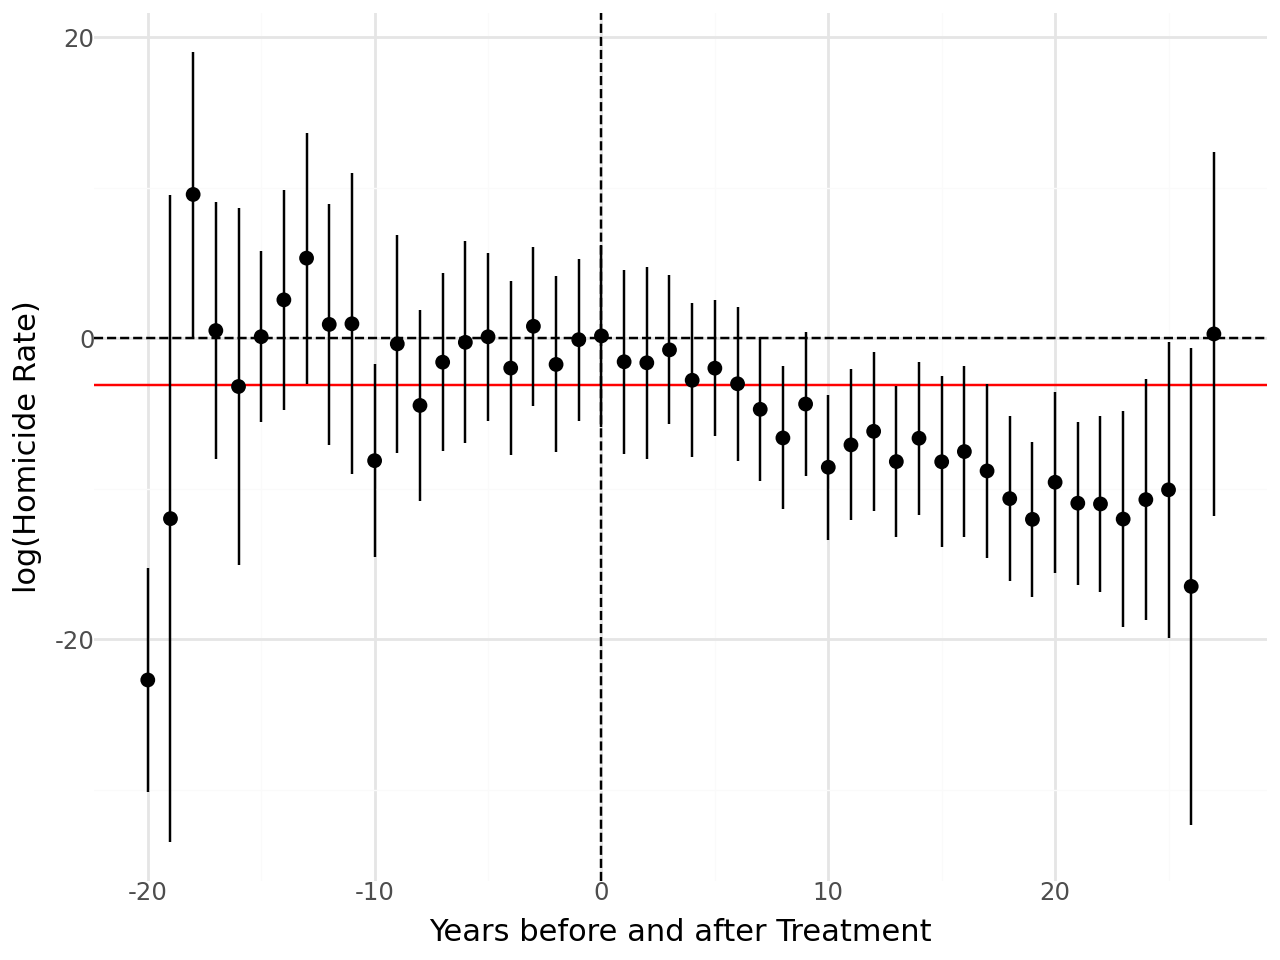

In [7]:
# Criando as variáveis desagregadas do efeito de D manualmente:

data['lead1'] = data['timeToTreat'] == -1
data['lead2'] = data['timeToTreat'] == -2
data['lead3'] = data['timeToTreat'] == -3
data['lead4'] = data['timeToTreat'] == -4
data['lead5'] = data['timeToTreat'] == -5
data['lead6'] = data['timeToTreat'] == -6
data['lead7'] = data['timeToTreat'] == -7
data['lead8'] = data['timeToTreat'] == -8
data['lead9'] = data['timeToTreat'] == -9
data['lead10'] = data['timeToTreat'] == -10
data['lead11'] = data['timeToTreat'] == -11
data['lead12'] = data['timeToTreat'] == -12
data['lead13'] = data['timeToTreat'] == -13
data['lead14'] = data['timeToTreat'] == -14
data['lead15'] = data['timeToTreat'] == -15
data['lead16'] = data['timeToTreat'] == -16
data['lead17'] = data['timeToTreat'] == -17
data['lead18'] = data['timeToTreat'] == -18
data['lead19'] = data['timeToTreat'] == -19
data['lead20'] = data['timeToTreat'] == -20
data['lead21'] = data['timeToTreat'] == -21

data['lag0'] = data['timeToTreat'] == 0 
data['lag1'] = data['timeToTreat'] == 1 
data['lag2'] = data['timeToTreat'] == 2 
data['lag3'] = data['timeToTreat'] == 3 
data['lag4'] = data['timeToTreat'] == 4 
data['lag5'] = data['timeToTreat'] == 5 
data['lag6'] = data['timeToTreat'] == 6 
data['lag7'] = data['timeToTreat'] == 7 
data['lag8'] = data['timeToTreat'] == 8 
data['lag9'] = data['timeToTreat'] == 9 
data['lag10'] = data['timeToTreat'] == 10 
data['lag11'] = data['timeToTreat'] == 11 
data['lag12'] = data['timeToTreat'] == 12 
data['lag13'] = data['timeToTreat'] == 13 
data['lag14'] = data['timeToTreat'] == 14 
data['lag15'] = data['timeToTreat'] == 15 
data['lag16'] = data['timeToTreat'] == 16 
data['lag17'] = data['timeToTreat'] == 17 
data['lag18'] = data['timeToTreat'] == 18 
data['lag19'] = data['timeToTreat'] == 19 
data['lag20'] = data['timeToTreat'] == 20 
data['lag21'] = data['timeToTreat'] == 21 
data['lag22'] = data['timeToTreat'] == 22 
data['lag23'] = data['timeToTreat'] == 23 
data['lag24'] = data['timeToTreat'] == 24 
data['lag25'] = data['timeToTreat'] == 25 
data['lag26'] = data['timeToTreat'] == 26 
data['lag27'] = data['timeToTreat'] == 27 

# Desagregamos o efeito D, e consideramos os efeitos fixos.
formula = "asmrs ~ lead21 + lead20 + lead19 + lead18 + lead17 + lead16 + lead15 + lead14 + lead13 + lead12 + lead11 + lead10 + lead9 + lead8 + lead7 + lead6 + lead5 + lead4 + lead3 + lead2 + lead1 + lag1 + lag2 + lag3 + lag4 + lag5 + lag6 + lag7 + lag8 + lag9 + lag10 + lag11 + lag12 + lag13 + lag14 + lag15 + lag16 + lag17 + lag18 + lag19 + lag20 + lag21 + lag22 + lag23 + lag24 + lag25 + lag26 + lag27 + C(year) + C(stfips)"

# Os coeficientes para o Event Study são estimados:
reg_event_study = smf.wls(formula, data = data).fit(cov_type='HC1')

# Criamos duas listas com os coeficientes estimados
leads = ['lead21[T.True]', 'lead20[T.True]', 'lead19[T.True]', 'lead18[T.True]', 'lead17[T.True]', 'lead16[T.True]', 'lead15[T.True]', 'lead14[T.True]', 'lead13[T.True]', 'lead12[T.True]', 'lead11[T.True]', 'lead10[T.True]', 'lead9[T.True]', 'lead8[T.True]', 'lead7[T.True]', 'lead6[T.True]', 'lead5[T.True]', 'lead4[T.True]', 'lead3[T.True]', 'lead2[T.True]', 'lead1[T.True]']
lags = ['lag1[T.True]', 'lag2[T.True]', 'lag3[T.True]', 'lag4[T.True]', 'lag5[T.True]', 'lag6[T.True]', 'lag7[T.True]', 'lag8[T.True]', 'lag9[T.True]', 'lag10[T.True]', 'lag11[T.True]', 'lag12[T.True]', 'lag13[T.True]', 'lag14[T.True]', 'lag15[T.True]', 'lag16[T.True]', 'lag17[T.True]', 'lag18[T.True]', 'lag19[T.True]', 'lag20[T.True]', 'lag21[T.True]', 'lag22[T.True]', 'lag23[T.True]', 'lag24[T.True]', 'lag25[T.True]', 'lag26[T.True]', 'lag27[T.True]']

# Agora a ideia é construir um DataFrame com os coeficientes estimados e seus respectivos desvios padrão para depois gerar o gráfico do Event Study.
# Coeficientes das variáveis 'leads' e 'lags'
coef_leads = reg_event_study.params[leads]
coef_lags = reg_event_study.params[lags]

# Desvios padrão dos coeficientes 'leads' e 'lags'
std_leads = np.sqrt(np.diag(reg_event_study.cov_params().loc[leads][leads]))
std_lags = np.sqrt(np.diag(reg_event_study.cov_params().loc[lags][lags]))

# Crie um DataFrame para 'leads'
df_leads = pd.DataFrame({
    'mean': coef_leads,
    'sd': std_leads,
    'variable': leads
})

# Crie um DataFrame para 'lags'
df_lags = pd.DataFrame({
    'mean': coef_lags,
    'sd': std_lags,
    'variable': lags
})

# Combine os DataFrames de 'leads' e 'lags'
leadslags_plot = pd.concat([df_leads, df_lags])

leadslags_plot['lb'] = leadslags_plot['mean'] - leadslags_plot['sd']*1.96
leadslags_plot['ub'] = leadslags_plot['mean'] + leadslags_plot['sd']*1.96

leadslags_plot['N'] = range(1, len(leadslags_plot) + 1)
leadslags_plot['TimeToTreat'] = leadslags_plot['N'] - 21

# Código para plotar o Event Study
p.ggplot(leadslags_plot, p.aes(x = 'TimeToTreat', y = 'mean',
             ymin = 'lb', 
             ymax = 'ub')) +\
    p.geom_hline(yintercept = -3.0799, color = "red") +\
    p.geom_pointrange() +\
    p.theme_minimal() +\
    p.xlab("Years before and after Treatment") +\
    p.ylab("log(Homicide Rate)") +\
    p.geom_hline(yintercept = 0,
             linetype = "dashed") +\
    p.geom_vline(xintercept = 0,
             linetype = "dashed")

Percebemos no Gráfico de Event Study que o efeito do tratamento é negativo e significativo para os anos posteriores à intervenção. Principalmente após o sétimo ano. O efeito médio estimado para o período pós-intervenção é de -3.0799. Fica evidente que o efeito do tratamento é gradual.

Esse exemplo anterior foi motivo de muita discussão na literatura. Principalmente na literatura de econometria teórica, porque surge dúvidas sobre possíveis viéses do estimador porque eles está considerando diversos grupos de tratamento e controles distintos. Por exemplo, existem estados que começam o tratamento em 1971, outros em 1972, outros em 1973, e assim por diante. 

In [10]:
# Load packages
import pandas as pd
import numpy as np
from datetime import date
from tqdm import tqdm
import plotly.graph_objects as go
import telegram_send
import paneleventstudy as es
from linearmodels import PanelOLS
import statsmodels.formula.api as smf

df = pd.read_stata("https://github.com/Daniel-Uhr/data/raw/main/bacon_example.dta")

In [ ]:
# Outcome (Suicide Mortality)
df['Y'] = df['asmrs']
# Treatment D (Staggered treatment adoption)
df['D'] = df['post']
# Covariáveis - pcinc asmrh cases
df['X1'] = df['pcinc']
df['X2'] = df['asmrh']
df['X3'] = df['cases']

# Identificação do painel
df['year'] = df['year'].astype(int)
df['id'] = df['stfips'].astype('category').cat.codes + 1


# Relative time (Tempo relativo até o tratamento - ocorre somente para os tratados)
df['reltime'] = df['year'] - df['_nfd']
# colocar valor zero caso tenha dados faltantes
df['reltime'] = df['reltime'].fillna(0)
# garantir que 'reltime' seja um inteiro
df['reltime'] = df['reltime'].astype(int)

# Generates a new column called 'ct' containing the numerics version of calendar time 'year'
df['ct'] = df['year'] - 1964

# Vamos criar a variável de grupo (cohoort) e G (Callaway-SantAnna)
df['cohort'] = df['_nfd'] - 1965
df['G']=df['_nfd']

# control group
df['treated'] = 0
df.loc[df['_nfd'] > 0, 'treated'] = 1
df['untreated_group'] = 1
df.loc[df['treated'] == 1, 'untreated_group'] = 0

# Criar uma coluna que identifica os indivíduos que nunca foram tratados (nevertreated)
df['nevertreated'] = 0
df.loc[df['treated'] == 0, 'nevertreated'] = 1

# Criar uma coluna que identifica os indivíduos que sempre foram tratados (alwaystreated) Deve ser 1 para todos os anos após o tratamento D
df['mean_treat'] = df.groupby('id')['D'].transform('mean')
# Criar os sempre tratados
df['alwaystreated'] = 0
df.loc[(df['mean_treat'] == 1), 'alwaystreated'] = 1

In [12]:
# TWFE naive - Dynamic Difference-in-Differences

# Especificar a fórmula com a categoria 0 de reltime como referência diretamente
formula = 'Y ~ C(reltime, Treatment(reference=0)) + C(id) + C(year)'

# Ajustar o modelo
twfe = smf.ols(formula, data=df).fit(cov_type='HC1')

# Extraindo os resultados
beta = pd.DataFrame(twfe.params, columns=['coef'])  # Coeficientes estimados
ci = twfe.conf_int()  # Intervalos de confiança

# Renomear as colunas do intervalo de confiança para consistência
ci.columns = ['lower', 'upper']

# Combinar os resultados em um único DataFrame
est = beta.join(ci)

# Manter apenas os coeficientes relativos ao efeito de reltime
est = est.reset_index(drop=False)
est = est[est['index'].str.contains('C(reltime, Treatment(reference=0))[T.', regex=False)]  

# Clean the coefficient names for readability
est['index'] = est['index'].str.replace('C(reltime, Treatment(reference=0))[T.', '', regex=False)  # Remove the prefix
est['index'] = est['index'].str.replace(']', '', regex=False)         # Remove closing brackets

# Set the index to the cleaned relative time
est = est.set_index('index')

est = est.reset_index()  # Transforma o índice em uma coluna
est['index'] = pd.to_numeric(est['index'])  # Converte para numérico

est = est.sort_values('index')  # Agora ordenará corretamente
# Certifique-se de que o índice é numérico para ordenação
est.index = pd.to_numeric(est.index)

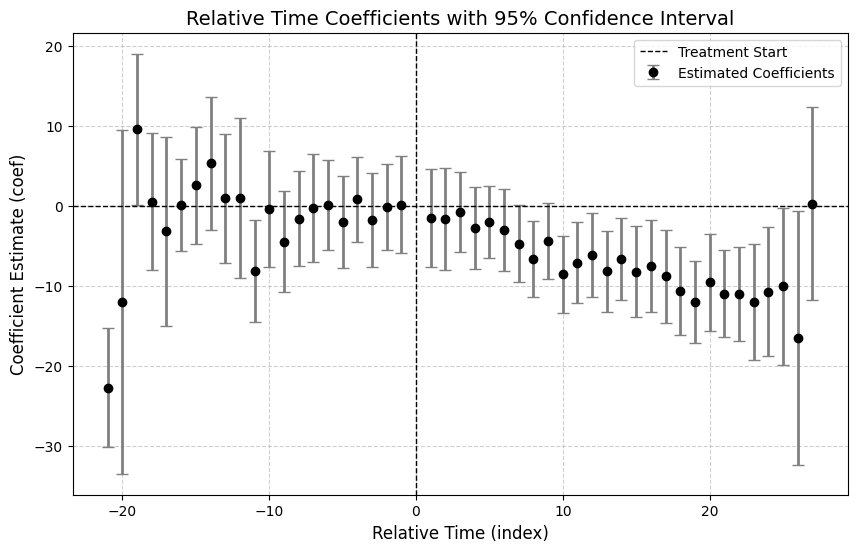

In [13]:
import matplotlib.pyplot as plt

# Configurar o gráfico
plt.figure(figsize=(10, 6))

# Plotar os coeficientes com barras de erro
plt.errorbar(
    est['index'],  # Valores do eixo x
    est['coef'],   # Valores do eixo y (coeficientes)
    yerr=[est['coef'] - est['lower'], est['upper'] - est['coef']],  # Barras de erro
    fmt='o', color='black', ecolor='gray', elinewidth=2, capsize=4, label='Estimated Coefficients'
)

# Adicionar uma linha horizontal no valor 0 para referência
plt.axhline(0, color='black', linestyle='--', linewidth=1)

# Adicionar linha vertical para o início do tratamento em zero
plt.axvline(0, color='black', linestyle='--', linewidth=1, label='Treatment Start')

# Adicionar título e rótulos
plt.title('Relative Time Coefficients with 95% Confidence Interval', fontsize=14)
plt.xlabel('Relative Time (index)', fontsize=12)
plt.ylabel('Coefficient Estimate (coef)', fontsize=12)

# Adicionar grade e legenda
plt.grid(True, linestyle='--', alpha=0.6)
plt.legend()

# Exibir o gráfico
plt.show()
